## Classification Task

## Rain in Australia
### Predict next-day rain in Australia


Dataset link: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [13]:
# Load dataset
import requests
import io

# I use the raw URL to download the raw CSV content from my github account
data_url = "https://raw.githubusercontent.com/kharkovsailing/EDA-with-Python/refs/heads/main/weatherAUS.csv"  # Updated URL

# Request the CSV data and decode it.
dataset = requests.get(data_url).content.decode('utf-8')

# Use StringIO to handle the text content like a file.
df = pd.read_csv(io.StringIO(dataset), sep=",", decimal=",")  # Added sep=";" and decimal=","

df.shape

(145460, 23)

In [14]:
# Display basic info
display(df.head())
display(df.info())

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21,23.2,No,No
3,2008-12-04,Albury,9.2,28,0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  object 
 3   MaxTemp        144199 non-null  object 
 4   Rainfall       142199 non-null  object 
 5   Evaporation    82670 non-null   object 
 6   Sunshine       75625 non-null   object 
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  object 
 16  Pressure3pm    130432 non-null  object 
 17  Cloud9am       89572 non-null

None

In [15]:
print(df.columns)


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [16]:
df.columns = df.columns.str.strip()


In [17]:
print(df.head())


         Date Location MinTemp MaxTemp Rainfall Evaporation Sunshine  \
0  2008-12-01   Albury    13.4    22.9      0.6         NaN      NaN   
1  2008-12-02   Albury     7.4    25.1        0         NaN      NaN   
2  2008-12-03   Albury    12.9    25.7        0         NaN      NaN   
3  2008-12-04   Albury     9.2      28        0         NaN      NaN   
4  2008-12-05   Albury    17.5    32.3        1         NaN      NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am Cloud3pm Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0      NaN    

In [18]:
print(df.dtypes)


Date              object
Location          object
MinTemp           object
MaxTemp           object
Rainfall          object
Evaporation       object
Sunshine          object
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am       object
Pressure3pm       object
Cloud9am         float64
Cloud3pm         float64
Temp9am           object
Temp3pm           object
RainToday         object
RainTomorrow      object
dtype: object


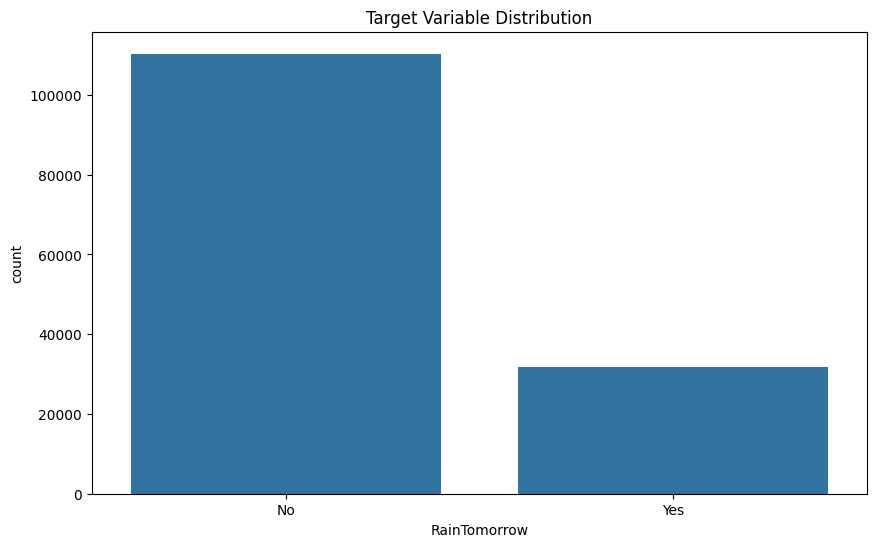

In [19]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Target Variable Distribution')
plt.show()

In [20]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [21]:
# Encoding categorical features
label_encoders = {}
for col in df_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_imputed[col] = le.fit_transform(df_imputed[col])
    label_encoders[col] = le


In [22]:
# Train-test split
X = df_imputed.drop(columns=['RainTomorrow'])
y = df_imputed['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Model training - Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22717
           1       0.71      0.46      0.56      6375

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



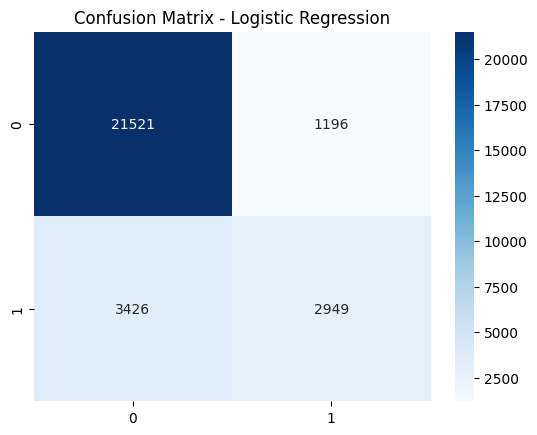

In [23]:
# Evaluation
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


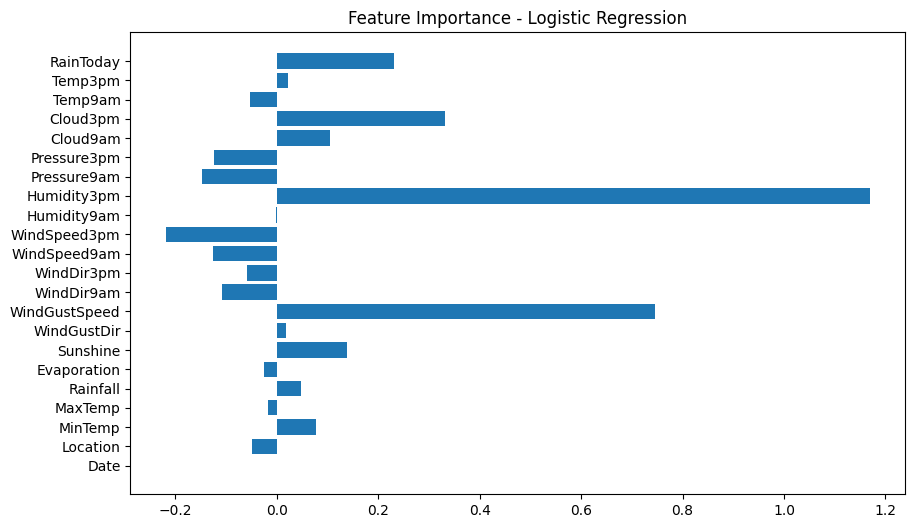

In [24]:
# Feature Importance
plt.figure(figsize=(10,6))
plt.barh(X.columns, log_reg.coef_[0])
plt.title('Feature Importance - Logistic Regression')
plt.show()

In [25]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90     22717
           1       0.66      0.46      0.54      6375

    accuracy                           0.83     29092
   macro avg       0.76      0.70      0.72     29092
weighted avg       0.82      0.83      0.82     29092



In [29]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86     22717
           1       0.51      0.60      0.55      6375

    accuracy                           0.78     29092
   macro avg       0.69      0.72      0.70     29092
weighted avg       0.80      0.78      0.79     29092



I didn'n run next  blocks.

In [ ]:
# Support Vector Machine (SVM)
#svm = SVC(probability=True)
#svm.fit(X_train_scaled, y_train)
#y_pred_svm = svm.predict(X_test_scaled)
#print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

In [ ]:
# Threshold Analysis
#y_probs = log_reg.predict_proba(X_test_scaled)[:,1]
#fpr, tpr, thresholds = roc_curve(y_test, y_probs)
#optimal_idx = np.argmax(tpr - fpr)
#optimal_threshold = thresholds[optimal_idx]
#print(f"Optimal Threshold: {optimal_threshold}")

Instead, I tried to use a Linear Kernel. But, It also took too long and I didn't get the result.

In [ ]:
# Support Vector Machine (SVM)
#svm = SVC(kernel='linear', probability=True)
#svm.fit(X_train_scaled, y_train)
#y_pred_svm = svm.predict(X_test_scaled)
#print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

I also tried on sample

In [ ]:
#X_train_sample, _, y_train_sample, _ = train_test_split(X_train_scaled, y_train, test_size=0.8, random_state=42)
#svm.fit(X_train_sample, y_train_sample)

 To Reduce Feature Space: **Principal Component Analysis **(PCA) before training:

In [ ]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=10)  # Reduce to 10 components
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)
#svm.fit(X_train_pca, y_train)
#y_pred_svm = svm.predict(X_test_pca)

Tune Hyperparameters

In [ ]:
#svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True)

In [ ]:
#plt.figure(figsize=(10,6))
#plt.plot(fpr, tpr, label='ROC Curve')
#plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label='Optimal Threshold')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curve with Optimal Threshold')
#plt.legend()
#plt.show()

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Threshold Analysis
y_probs = log_reg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label='Optimal Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend()
plt.show()